<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
print('Rows: {}, Cols: {}'.format(movies.shape[0], movies.shape[1]))

Rows: 979, Cols: 6


#### Check the data type of each column.

In [4]:
# Answer: 
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
print('Average movie duration: {}'.format(movies.duration.mean()))

Average movie duration: 120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
DISPLAY_COLS = ['title', 'duration']
movies_sorted = movies.sort_values('duration', ascending=False)

print('LONGEST')
print(movies_sorted[DISPLAY_COLS].iloc[:5])

print('--------')
print('SHORTEST')
print(movies_sorted[DISPLAY_COLS].iloc[-5:])

LONGEST
                                 title  duration
476                             Hamlet       242
157                 Gone with the Wind       238
78         Once Upon a Time in America       229
142  Lagaan: Once Upon a Time in India       224
445               The Ten Commandments       220
--------
SHORTEST
                           title  duration
293                    Duck Soup        68
88                       The Kid        68
258  The Cabinet of Dr. Caligari        67
338          Battleship Potemkin        66
389                       Freaks        64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

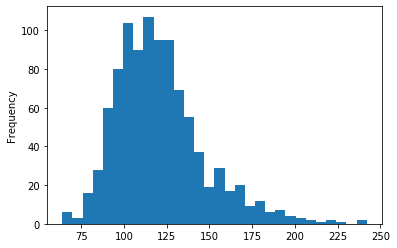

In [8]:
# Answer:
movies.duration.describe()
movies.duration.plot(kind='hist', bins=30);

#### Use a box plot to display that same data.

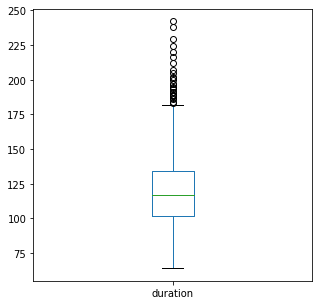

In [9]:
# Answer: 
movies.duration.plot(kind='box',figsize=(5,5));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

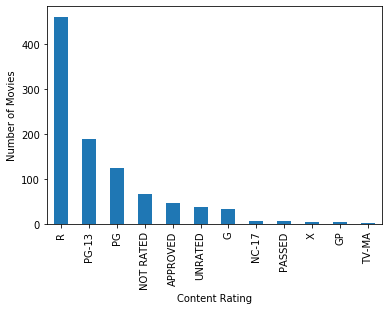

In [12]:
# Answer: 
ax = movies.content_rating.value_counts().plot(kind='bar');
ax.set_xlabel("Content Rating");
ax.set_ylabel("Number of Movies");

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Answer: 
find_cont = ["NOT RATED","APPROVED","PASSED","GP"]
movies.content_rating = movies.content_rating.replace(find_cont,"UNRATED")

In [14]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
# Answer: find_cont = ['X','TV-MA']
movies.content_rating = movies.content_rating.replace(find_cont,'NC-17')

In [19]:
# Answer: ax = movies.content_rating.value_counts().plot(kind='bar');
ax.set_xlabel("Content Rating");
ax.set_ylabel("Number of Movies");

#### Count the number of missing values in each column.

In [20]:
movies.apply(pd.isnull).agg('sum')

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [22]:
# Answer: 
movies.content_rating.fillna(value="UNRATED", inplace=True)

# Verify there are no longer null values
movies.content_rating.isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer: 
mean_long = movies[movies.duration>=120].star_rating.mean()
mean_short = movies[movies.duration<120].star_rating.mean()
print("Avg long movie rating: {}".format(mean_long))
print("Avg short movie rating: {}".format(mean_short))

Avg long movie rating: 7.948898678414082
Avg short movie rating: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

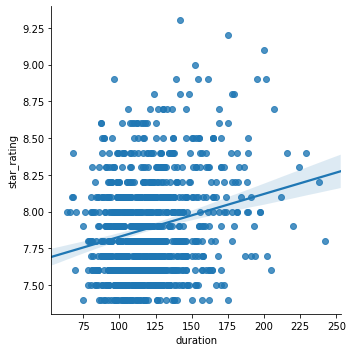

In [24]:
# Answer:
import seaborn as sns
#movies.plot(x="duration", y='star_rating', kind='scatter', figsize=(15,7))
sns.lmplot(x="duration", y='star_rating', data=movies);

#### Calculate the average duration for each genre.

In [25]:
# Answer: 
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

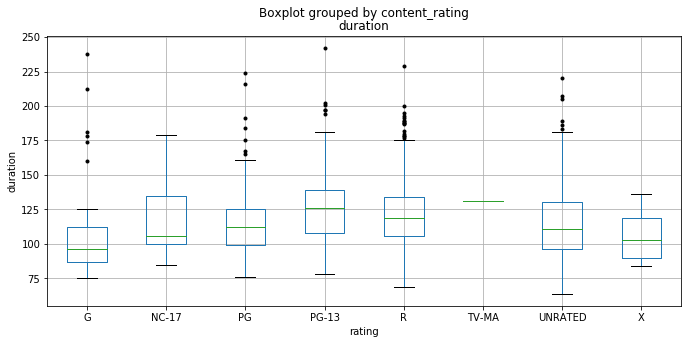

In [26]:
# Answer:
movies.boxplot(column='duration', by='content_rating', 
               figsize=(11,5), sym='k.');

plt.xlabel('rating');
plt.ylabel('duration');

#### Determine the top rated movie (by star rating) for each genre.

In [27]:
# Answer:

DISPLAY_COLS = ['genre', 'title', 'star_rating']

movies_sorted = movies.sort_values('star_rating', ascending=False)
movies_sorted.groupby('genre').head(1)[DISPLAY_COLS]

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
3,Action,The Dark Knight,9.0
5,Drama,12 Angry Men,8.9
6,Western,"The Good, the Bad and the Ugly",8.9
7,Adventure,The Lord of the Rings: The Return of the King,8.9
8,Biography,Schindler's List,8.9
39,Horror,Psycho,8.6
38,Mystery,Rear Window,8.6
35,Comedy,Modern Times,8.6
30,Animation,Spirited Away,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [34]:
# Answer:
top_rate = movies.groupby('genre').star_rating.max()
genre_list = movies.genre.unique().tolist()

for g in genre_list:
    print ("Top Movies For:" + g,)
    movies[(movies.star_rating==top_rate[g]) & (movies.genre==g)].title.tolist(), "\n"

Top Movies For:Crime
Top Movies For:Action
Top Movies For:Drama
Top Movies For:Western
Top Movies For:Adventure
Top Movies For:Biography
Top Movies For:Comedy
Top Movies For:Animation
Top Movies For:Mystery
Top Movies For:Horror
Top Movies For:Film-Noir
Top Movies For:Sci-Fi
Top Movies For:History
Top Movies For:Thriller
Top Movies For:Family
Top Movies For:Fantasy


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [35]:
movies.groupby(by=['genre'], sort=False)['title','star_rating'].max() #.head(12)

,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Drama,Zulu,8.9
Western,Unforgiven,8.9
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Animation,Wreck-It Ralph,8.6
Mystery,Vertigo,8.6


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [37]:
# Answer: 

dups = movies[movies['title'].duplicated(False)].copy()

dups
# First, we create a dict -- {title: duration of its first movie}
first_duration = dups.groupby('title').duration.agg('first').to_dict()

# Now, we create a new col that indicates if the movie's duration 
#    is the same as the first movie in the same genre
dups['same_duration'] = dups.apply(
    lambda row: int(first_duration[row.title] == row.duration), axis=1)

# Finally, the sum of the equal column per movie should be 1!
#  (One of the movies has the same duration as itself.)
print('Any duplicates for these titles?')
dups.groupby('title')['same_duration'].sum() > 1

Any duplicates for these titles?


title
Dracula                            False
Les Miserables                     False
The Girl with the Dragon Tattoo    False
True Grit                          False
Name: same_duration, dtype: bool

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!